# Forest Cover Type Prediciton
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Data Cleaning
* Exploratory data analysis
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 
* This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices
* these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value.

## 2) Data Collection.
* The Dataset is collected from UCI Repository -  https://archive.ics.uci.edu/ml/datasets/covertype
* The data consists of 54 columns and 581012 rows.

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [41]:
df = pd.read_csv('covtype.csv')

#### Datatypes of the attributes

In [42]:
df.dtypes

Unnamed: 0                            int64
Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                      

#### Check statistics of data set

In [43]:
pd.set_option('display.max_columns', None) # we need to see all the columns
df.describe()

,Unnamed: 0,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7559.50000,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,0.00000,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3779.75000,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7559.50000,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

#### Inferences
- Count is 15120 for each column, so no data point is missing.
- Soil type 7,15,8 and 36 are constant(each value is zero), so they can be removed.
- Wilderness_Area and Soil_Type are one hot encoded. Hence, they could be converted back for some analysis.
- Scales are not the same for all. Hence, rescaling and standardisation may be necessary for some algorithms.

#### Remove unnecessary columns

In [44]:
df1 = df.copy()
#Remove unnecessary columns
remove_columns = []

#std = 0 are constant columns, they don't help in prediction process
for col in df1.columns:
    if df1[col].std() <= 0.02: #standard deviation is zero
        remove_columns.append(col)

#drop the columns        
df1.drop(remove_columns,axis=1,inplace=True)

print(remove_columns)
#Following columns are dropped

['Soil_Type7', 'Soil_Type8', 'Soil_Type15', 'Soil_Type25']


#### Restoring original values for better analysis.

#### The target variable of our data i.e Cover_Type is one hot encoded.
#### As our data is already preprocessed but we will  replace the foresteric values back to their original values for better analysis and data visualization.

In [45]:
df1['Cover_Type'].replace({1:'Spruce/Fir', 2:'Lodgepole Pine', 3:'Ponderosa Pine', 4:'Cottonwood/Willow', 5:'Aspen', 6:'Douglas-fir', 7:'Krummholz'}, inplace=True)

In [46]:
df1 = df1.rename(columns={"Wilderness_Area1":"Rawah_WA","Wilderness_Area2":"Neota_WA",
"Wilderness_Area3":"Comanche_Peak_WA","Wilderness_Area4":"Cache_la_Poudre_WA","Horizontal_Distance_To_Hydrology":"HD_Hydrology",
"Vertical_Distance_To_Hydrology":"VD_Hydrology","Horizontal_Distance_To_Roadways":"HD_Roadways",
                               "Horizontal_Distance_To_Fire_Points":"HD_Fire_Points"})

In [47]:
df2 = df1.copy()
df2['Wild Areas'] = (df2.iloc[:,10:15] == 1).idxmax(1)
df2['Soil types'] = (df2.iloc[:,15:55] == 1).idxmax(1)
df2['Wild Areas'].unique()

array(['Rawah_WA', 'Comanche_Peak_WA', 'Hillshade_3pm', 'Neota_WA'],
      dtype=object)

#### Drop the columns which are not required now

In [48]:
df2 = df2.drop(columns=['Rawah_WA', 'Neota_WA', 'Comanche_Peak_WA',
       'Cache_la_Poudre_WA', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

In [49]:
df=df2

**Show Top 5 Records**

In [50]:
df.head()

,Unnamed: 0,Id,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Soil_Type36,Cover_Type,Wild Areas,Soil types
0,0,1,2596,51,3,258,0,510,221,232,148,6279,0,Aspen,Rawah_WA,Soil_Type29
1,1,2,2590,56,2,212,-6,390,220,235,151,6225,0,Aspen,Rawah_WA,Soil_Type29
2,2,3,2804,139,9,268,65,3180,234,238,135,6121,0,Lodgepole Pine,Rawah_WA,Soil_Type12
3,3,4,2785,155,18,242,118,3090,238,238,122,6211,0,Lodgepole Pine,Rawah_WA,Soil_Type30
4,4,5,2595,45,2,153,-1,391,220,234,150,6172,0,Aspen,Rawah_WA,Soil_Type29


**Shape of the dataset**

In [51]:
df.shape

(15120, 16)

**Summary of the dataset**

In [52]:
# Display summary statistics for a dataframe
df.describe()

,Unnamed: 0,Id,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points,Soil_Type36
count,15120.00000,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7559.50000,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.000661
std,4364.91237,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.025710
min,0.00000,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000
25%,3779.75000,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000
50%,7559.50000,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000
75%,11339.25000,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,0.000000
max,15119.00000,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,1.000000


### Feature Information
* **Elevation :** Elevation in meters.
* **Aspect :** Aspect in degrees azimuth.
* **Slope :** Slope in degrees
* **Horizontal_Distance_To_Hydrology :**  Horz Dist to nearest surface water features
* **Vertical_Distance_To_Hydrology :** Vert Dist to nearest surface water features
* **Horizontal_Distance_To_Roadways :**Horz Dist to nearest roadway
* **Hillshade_9am (0 to 255 index):** Hillshade index at 9am, summer solstice.
* **Hillshade_Noon (0 to 255 index):**  Hillshade index at noon, summer solstice.
* **Hillshade_3pm (0 to 255 index) :**  Hillshade index at 3pm, summer solstice
* **Horizontal_Distance_To_Fire_Point :** Horz Dist to nearest wildfire ignition points
* **Wilderness_Area (4 binary columns, 0 = absence or 1 = presence)  :**Wilderness area designation
* **Soil_Type (40 binary columns, 0 = absence or 1 = presence):** Soil Type designation
* **Cover_Type (7 types, integers 1 to 7) :**  Forest Cover Type designation (target).

## 3. EXPLORING DATA

In [53]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['Unnamed: 0', 'Id', 'Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points', 'Soil_Type36']

We have 3 categorical features : ['Cover_Type', 'Wild Areas', 'Soil types']


## Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

### Numerical Features

In [54]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Num.png')

### Categorical Features

In [55]:
# categorical columns
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
# save plot
# plt.savefig('./images/Univariate_Cat.png')

## Multivariate Analysis
* Multivariate analysis is the analysis of more than one variable.

In [56]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25 and len(df[feature].unique())>3)]

continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]

encoded_categorical = [feature for feature in numeric_features if len(df[feature].unique()) <=3]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))
print('\nWe have {} encoded_categorical : {}'.format(len(encoded_categorical), encoded_categorical))

We have 0 discrete features : []

We have 12 continuous_features : ['Unnamed: 0', 'Id', 'Elevation', 'Aspect', 'Slope', 'HD_Hydrology', 'VD_Hydrology', 'HD_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'HD_Fire_Points']

We have 1 encoded_categorical : ['Soil_Type36']


In [57]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['Cover_Type', 'Wild Areas', 'Soil types', 'Soil_Type36']


### Check Multicollinearity in Numerical features

In [58]:
df[(list(df[continuous_features])[1:])].corr()

,Id,Elevation,Aspect,Slope,HD_Hydrology,VD_Hydrology,HD_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,HD_Fire_Points
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,-0.068739
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,0.443563
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,-0.052169
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,-0.239527
HD_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,0.158817
VD_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,-0.015048
HD_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,0.486386
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,0.078144
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,0.122098
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,0.043162


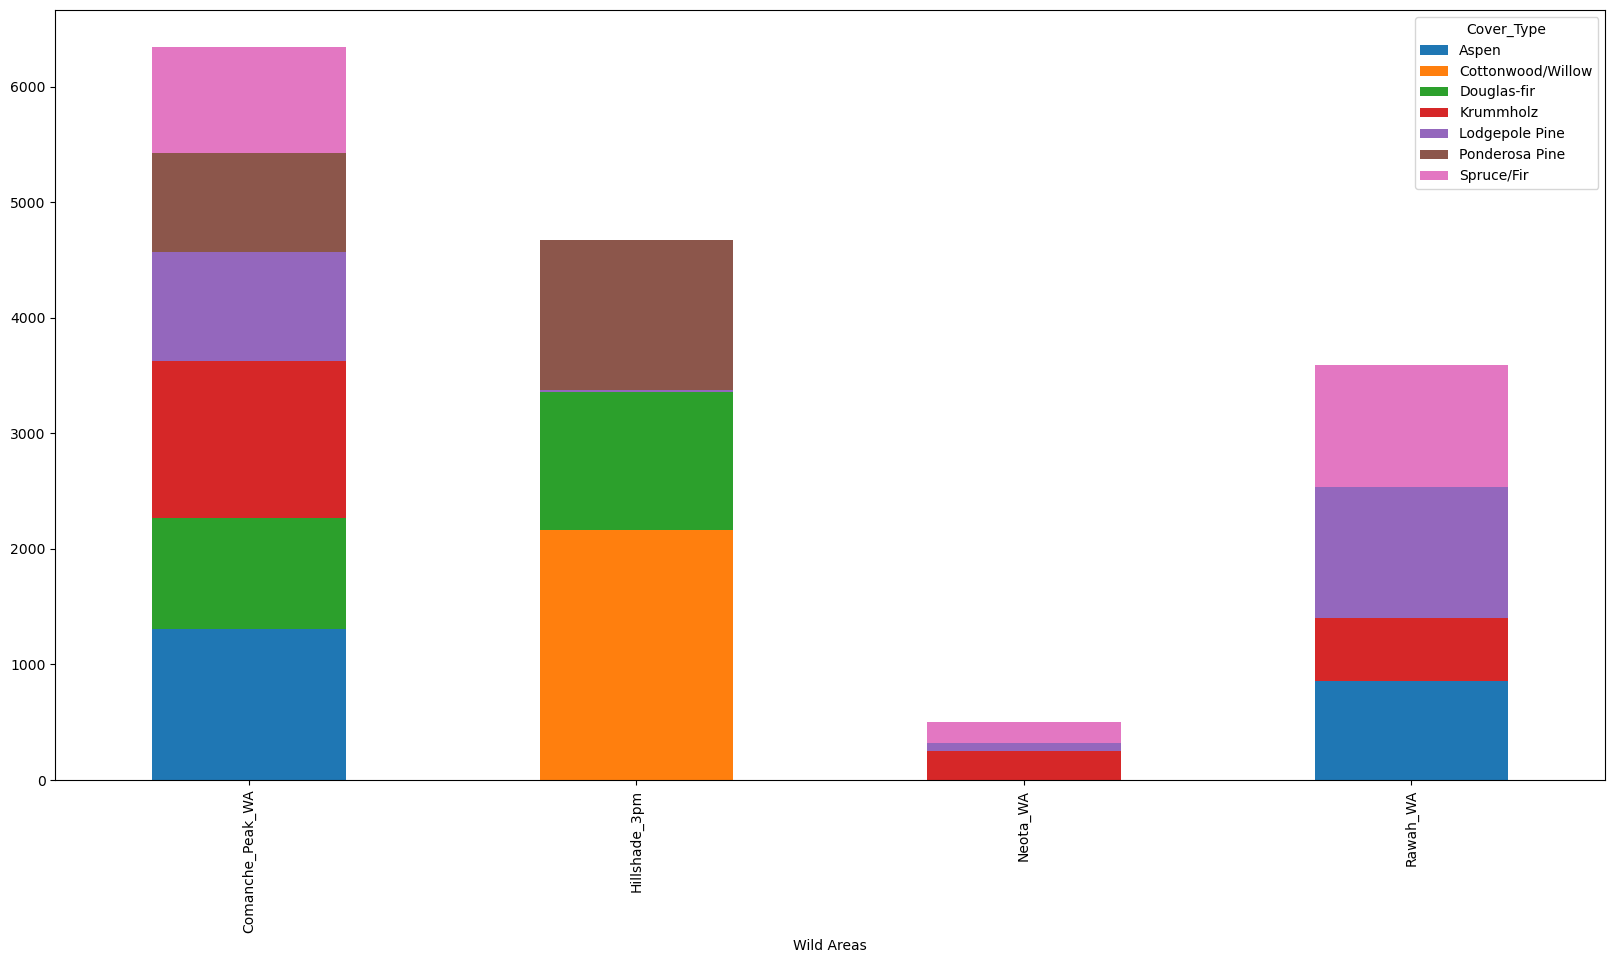

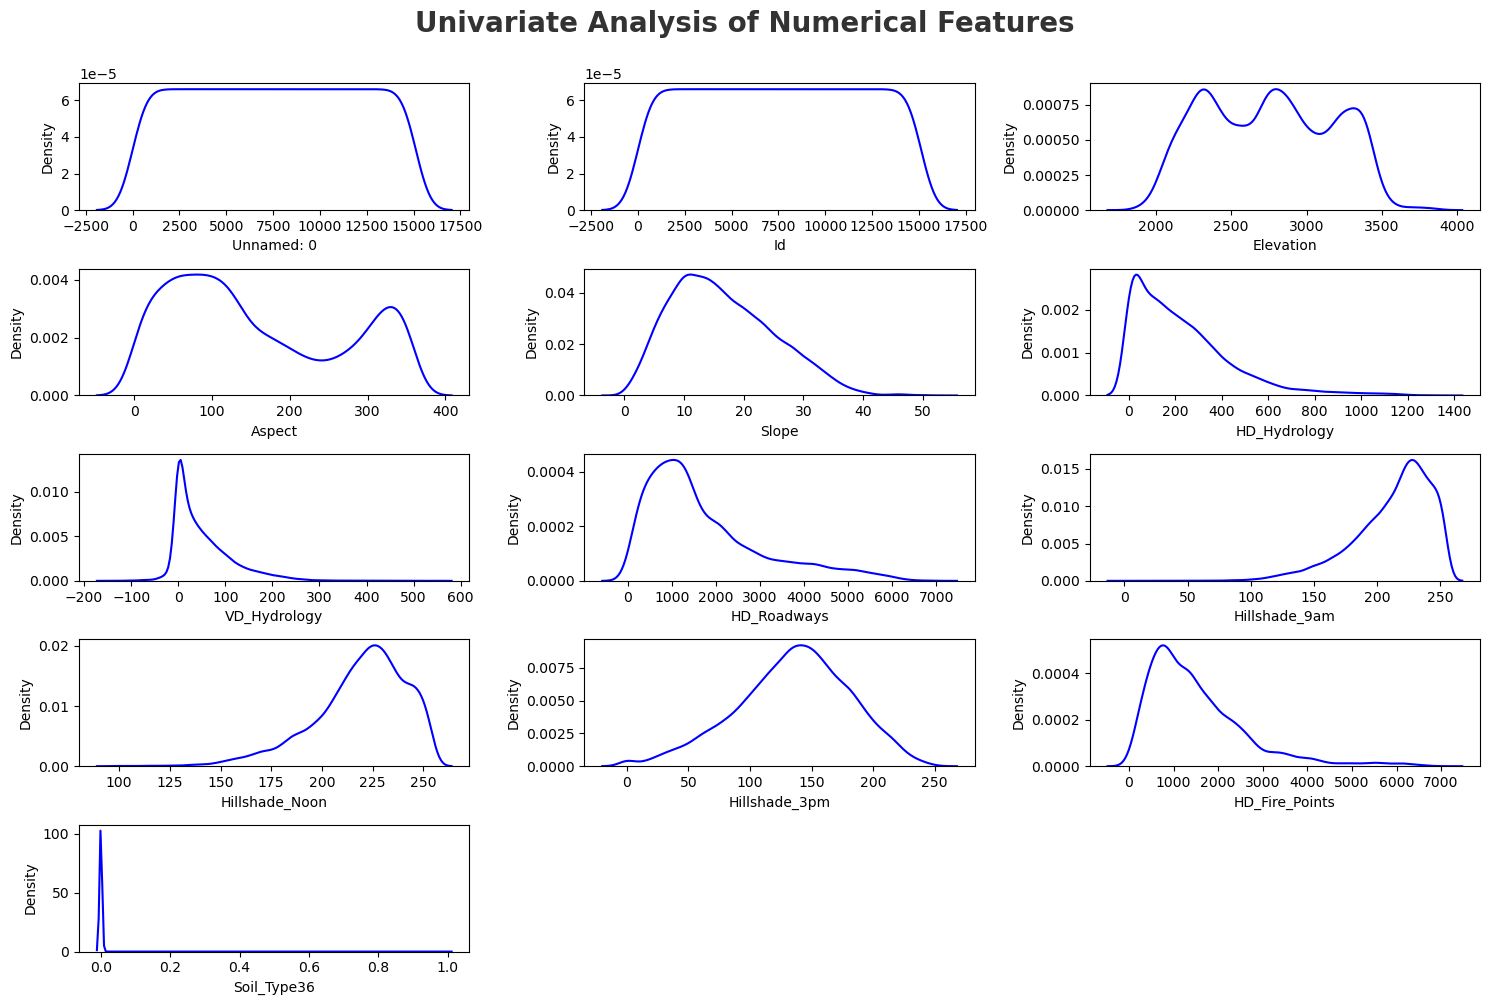

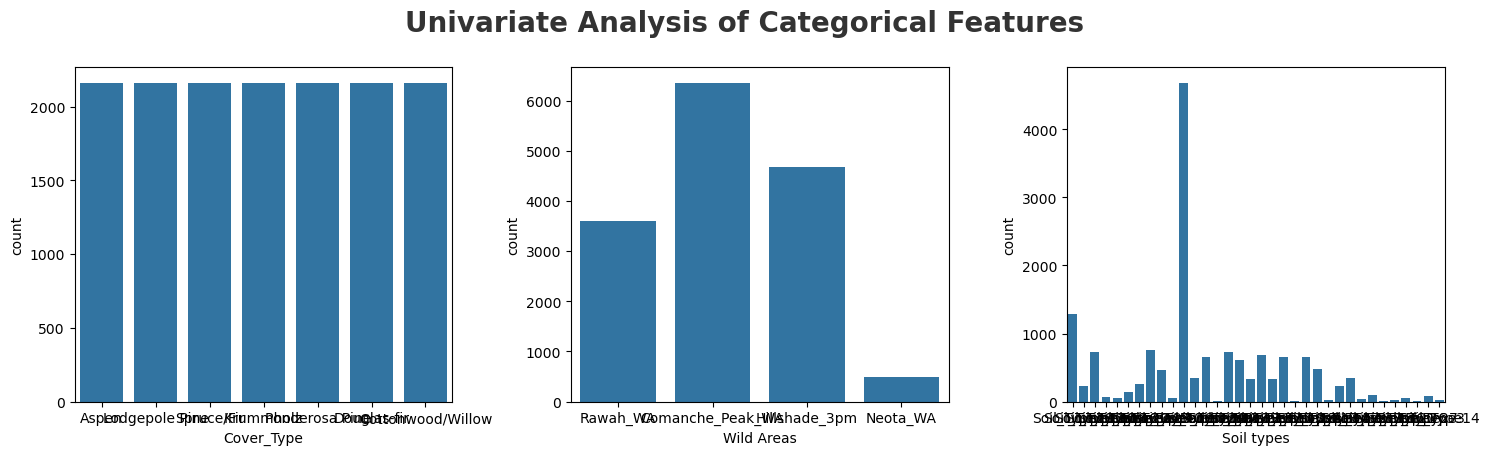

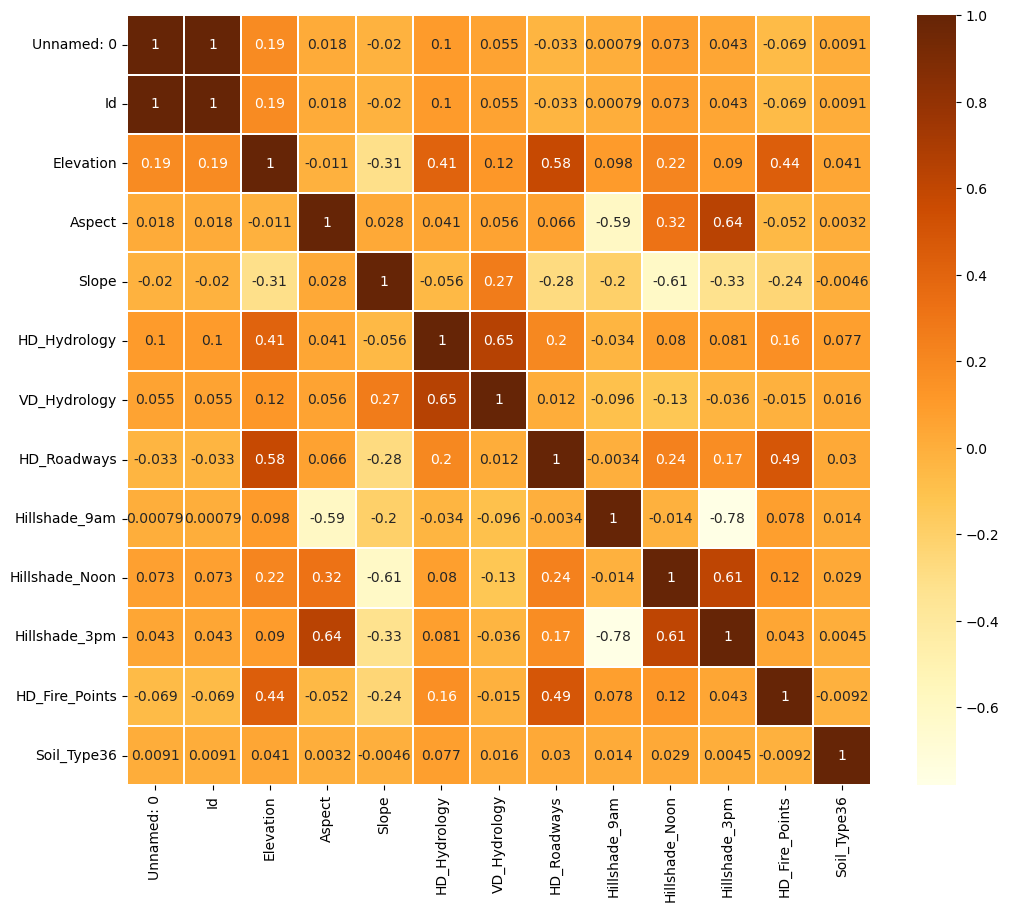

In [59]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidths=.3,cmap='YlOrBr')
plt.show()

#### Inferences (Correlated Features)
- Elevation and Horizontal Distance to Roadways.
- Aspect and Hillshade at 9am
- Aspect and Hillshade at 3pm
- Slope and Hillshade at Noon
- Horizontal Distance to hydrology and Vertical Distance to Hydrology
- Hillshade at 9am and Hillshade at 3pm
- Hillshade at 3pm and Hillshade at Noon

### Check Multicollinearity for Categorical features

* **A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test**

* **A chi-square statistic is one way to show a relationship between two categorical variables.**

* **Here we test correlation of Categorical columns with Target column i.e ProdTaken**

**Null Hypothesis ($ H_0 $)**: The Feature is independent of target column (No-Correlation)

**Alternative Hypothesis ($ H_1 $)**: The Feature and Target column are not independent (Correlated)

In [60]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['Cover_Type'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Cover_Type,Reject Null Hypothesis
1,Wild Areas,Reject Null Hypothesis
2,Soil types,Reject Null Hypothesis
3,Soil_Type36,Reject Null Hypothesis


### Checking Null Values

In [61]:
df.isnull().sum()

Unnamed: 0        0
Id                0
Elevation         0
Aspect            0
Slope             0
HD_Hydrology      0
VD_Hydrology      0
HD_Roadways       0
Hillshade_9am     0
Hillshade_Noon    0
Hillshade_3pm     0
HD_Fire_Points    0
Soil_Type36       0
Cover_Type        0
Wild Areas        0
Soil types        0
dtype: int64

#### How is the data distribution of our target column 'Cover_Type' ?

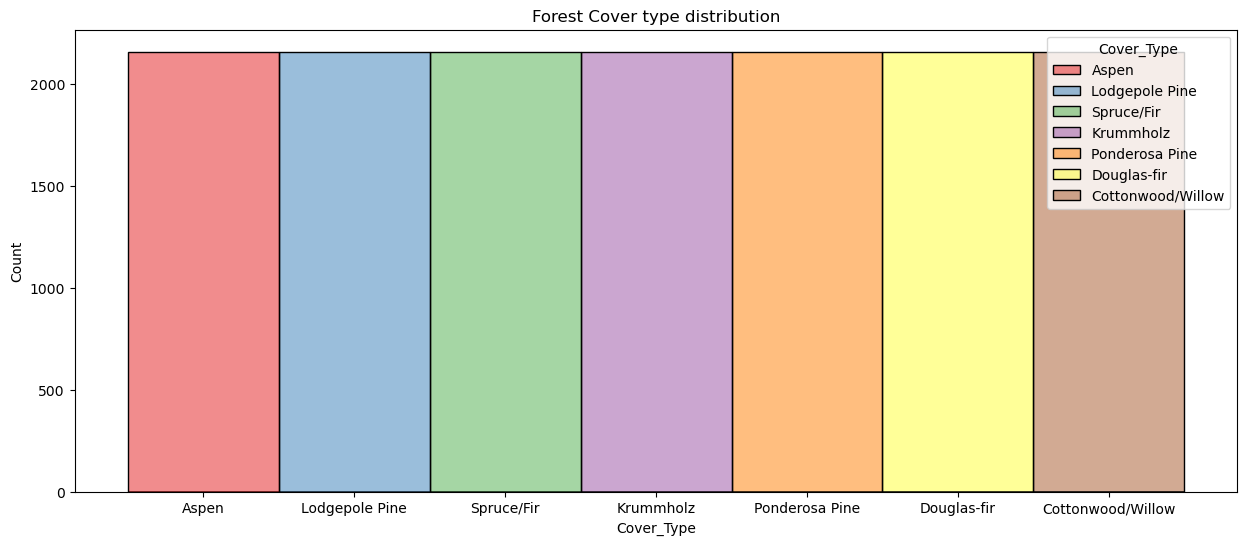

In [62]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="Cover_Type", hue = 'Cover_Type', palette='Set1')
plt.title('Forest Cover type distribution')
plt.show()

#### INFERENCE
- we can see 'Lodgepole Pine' has largest forest cover.
- 'Cottonwood/Willow' has lowest forest cover.

#### Which Wild area has what kind of Forest cover ?

In [63]:
wild_area_cover_type=df.groupby(['Wild Areas'])['Cover_Type'].value_counts().unstack()
wild_area_cover_type.plot(kind='bar', stacked=True,figsize=(20,10))

<Axes: xlabel='Wild Areas'>

#### INFERENCES
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers
- Comanche_Peak accounts for 42% of the total Wild Areas data.
- The least data is for Neota Wild Area i.e 3.3% in our data.
- We can also see that none of the wild areas have all the types of forest covers

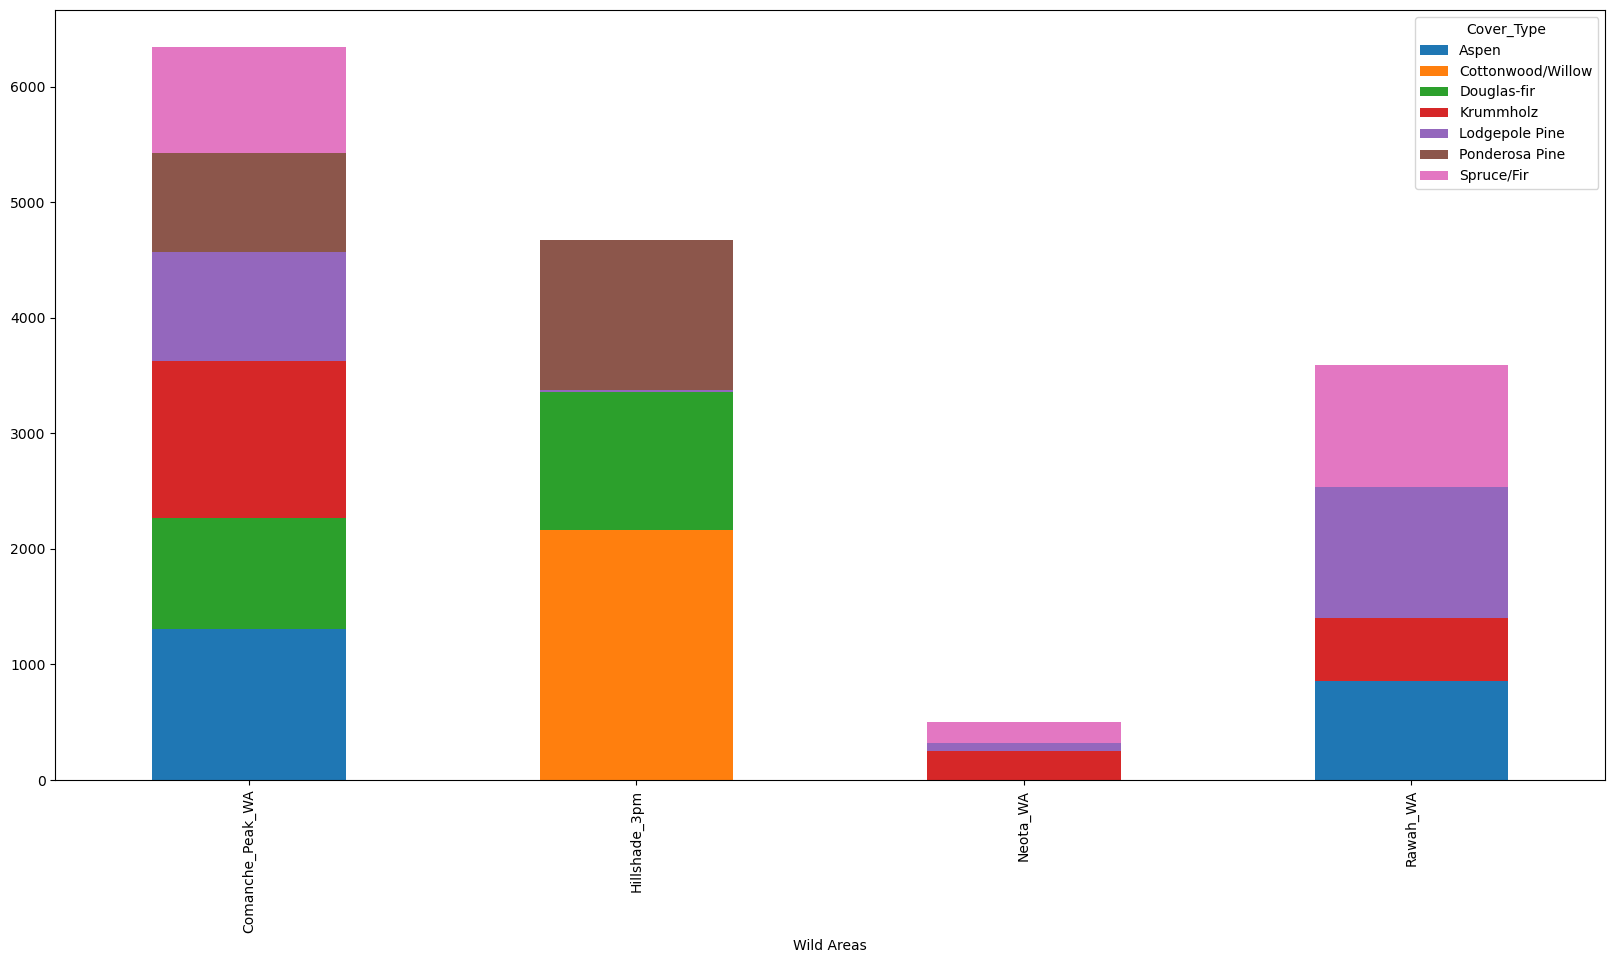

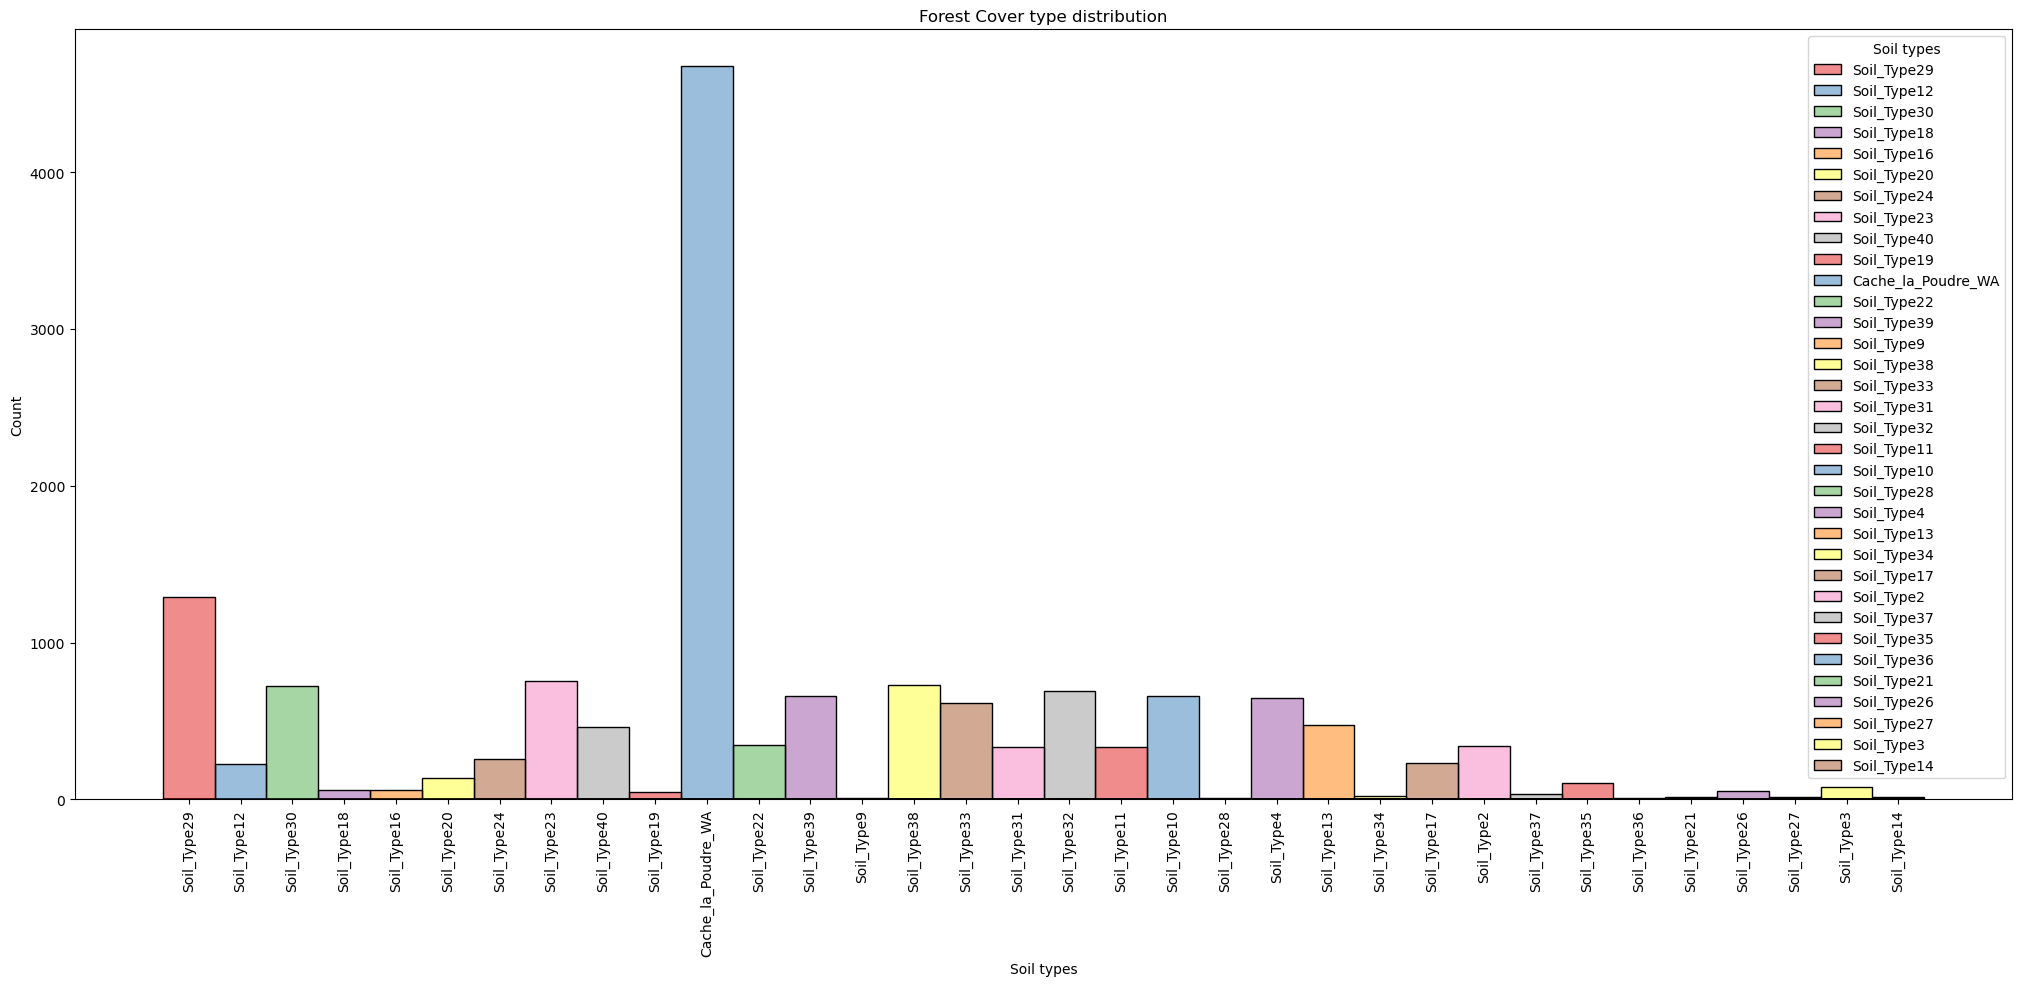

In [64]:
plt.figure(figsize=(25,10))
sns.histplot(data=df, x="Soil types", hue = 'Soil types', palette='Set1')
plt.title('Forest Cover type distribution')
plt.xticks(rotation=90)
plt.show()


#### INFERENCE
- We have most of the data for soil type 29 and 23.
- Many soil types are rare in our data

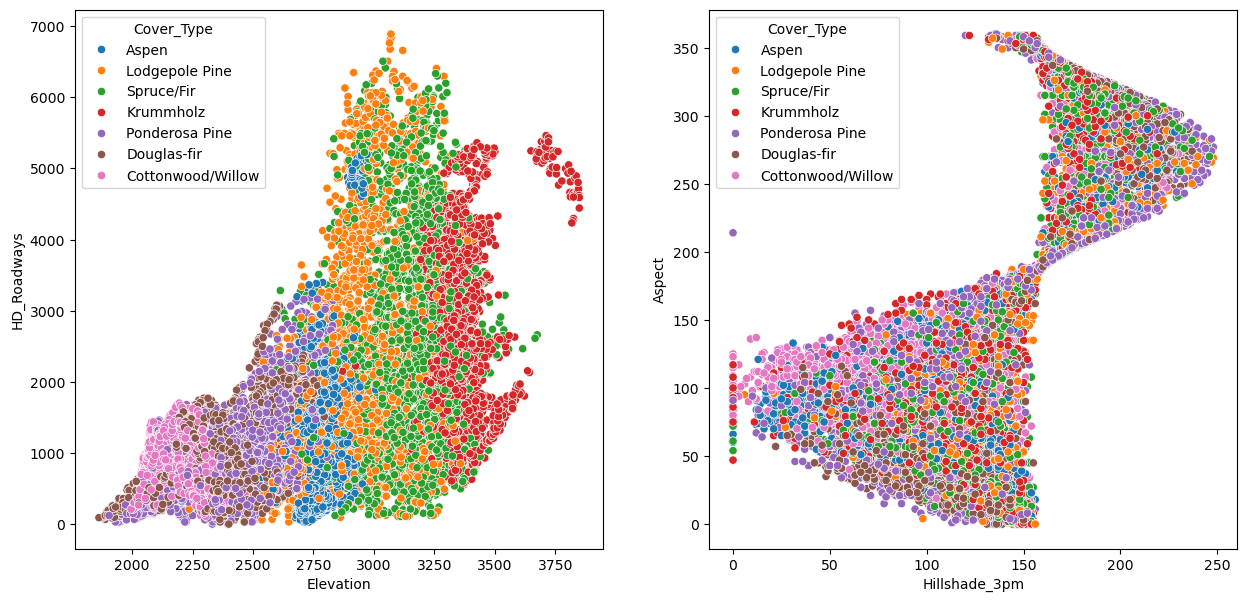

In [65]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='HD_Roadways',x='Elevation', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Aspect',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### Inference
- We can see a positive correlation between Elevation and Distance to Roadways.
- Cottonwood trees have the lowest Elevation and distance to roadways compared to other forest covers.
- Douglas trees grow on lower elevated areas but higher than compared to cottonwood trees.
- All Krummholz trees grow on higher elevated areas but we can see a variation in their distance to roadways value.

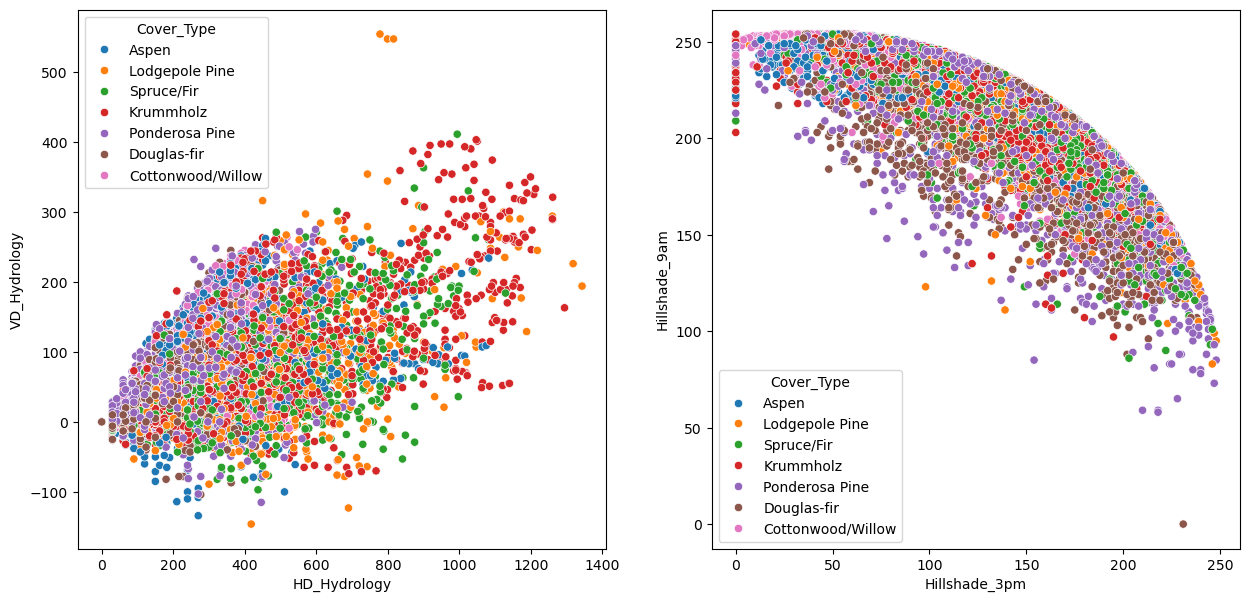

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.scatterplot(data=df,y='VD_Hydrology',x='HD_Hydrology', hue='Cover_Type')
plt.subplot(122)
sns.scatterplot(data=df,y='Hillshade_9am',x='Hillshade_3pm', hue='Cover_Type')
plt.show()

#### Inference 
- We can see positive correlation between both the distances to hydrology
- This graph is obvious as the shade at 9am will be opposite to the shade at 3pm on the area.
- We can see a negative correlation between hillshade index at 9am and 3pm

In [67]:
sns.set_style("whitegrid")
color = sns.color_palette('pastel')
plt.figure(figsize=(30,18))
for i,col in enumerate(numeric_features):
    plt.subplot(4,9,i+1)
    sns.boxplot(df[col], orient='h', palette=color)

#### Inference 
- Slope is the most squeezed box plot. It having a least range means that the median and mean will be quite close.
- Aspect features is the only one with little to none outliers.
- Elevation is the only feature that doesn't have a minimum value of 0. It is instead plotted in the middle having many outliers too.
- Horizontal_Distance_To_Roadways has the most spread out data of all features. This is because it has highest standard deviation score. Horizontal_Distance_To_Fire_Points has a similar look, but it has the maximum value.
- If we compare these two features, the last 50% of Horizontal_Distance_To_Roadways is much more spread and less dense compared to Horizontal_Distance_To_Fire_Points, hence having a high standard deviation score.

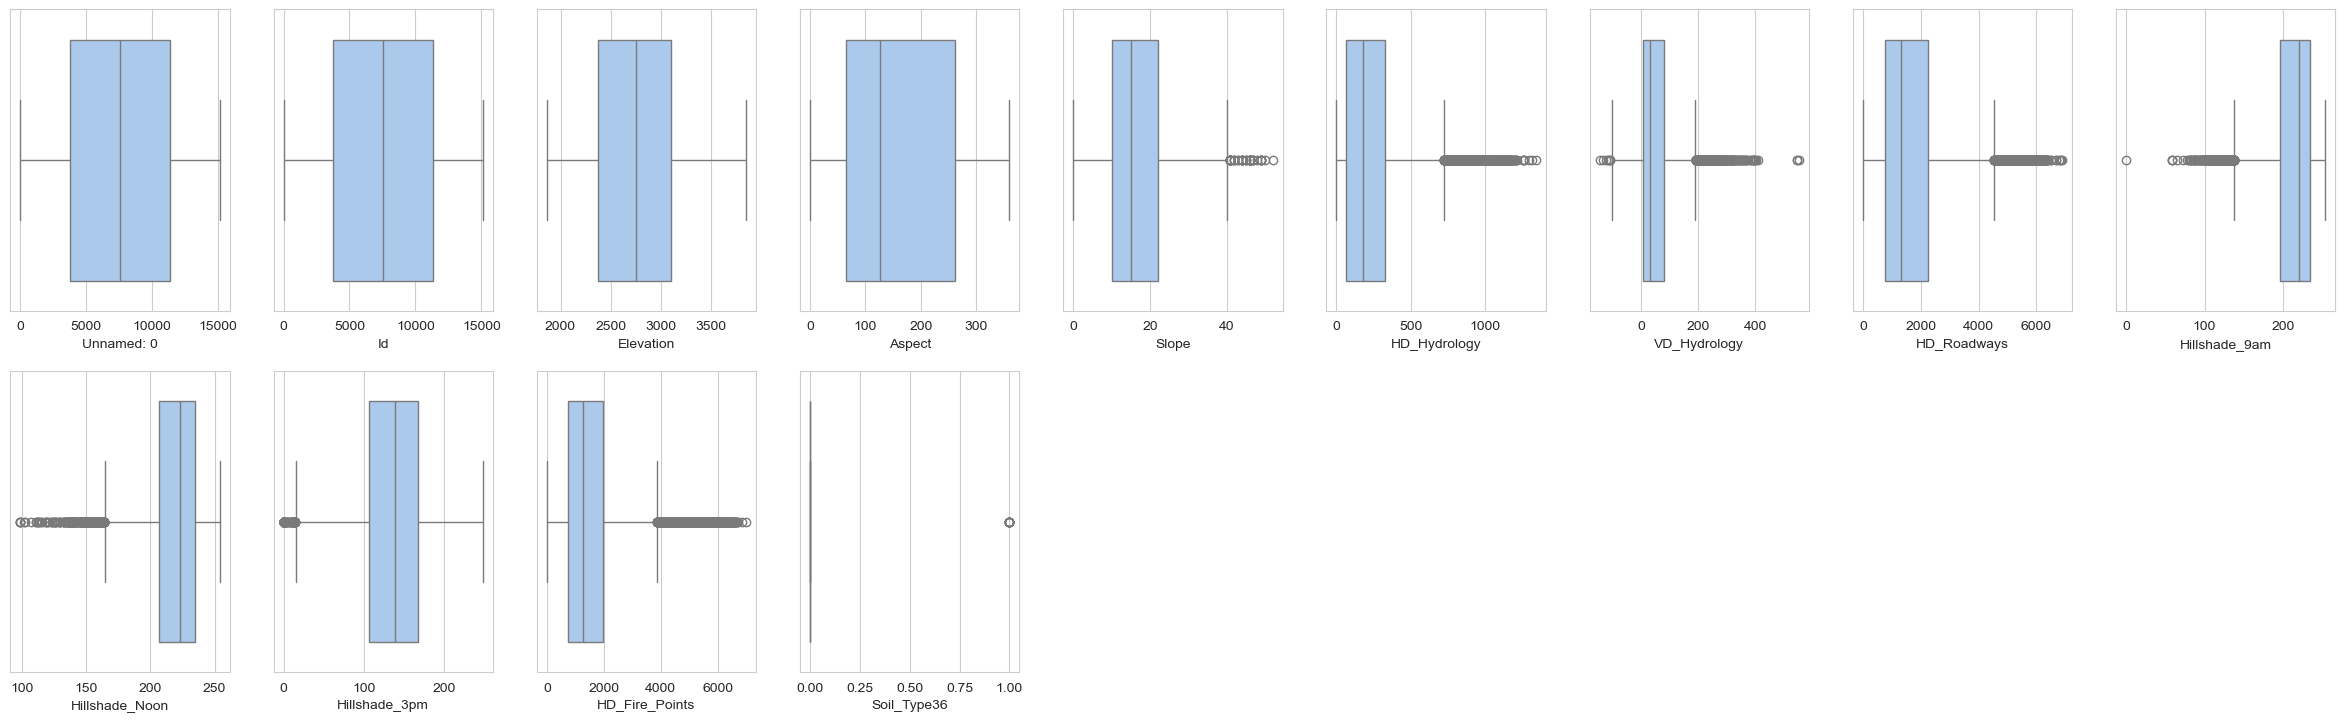

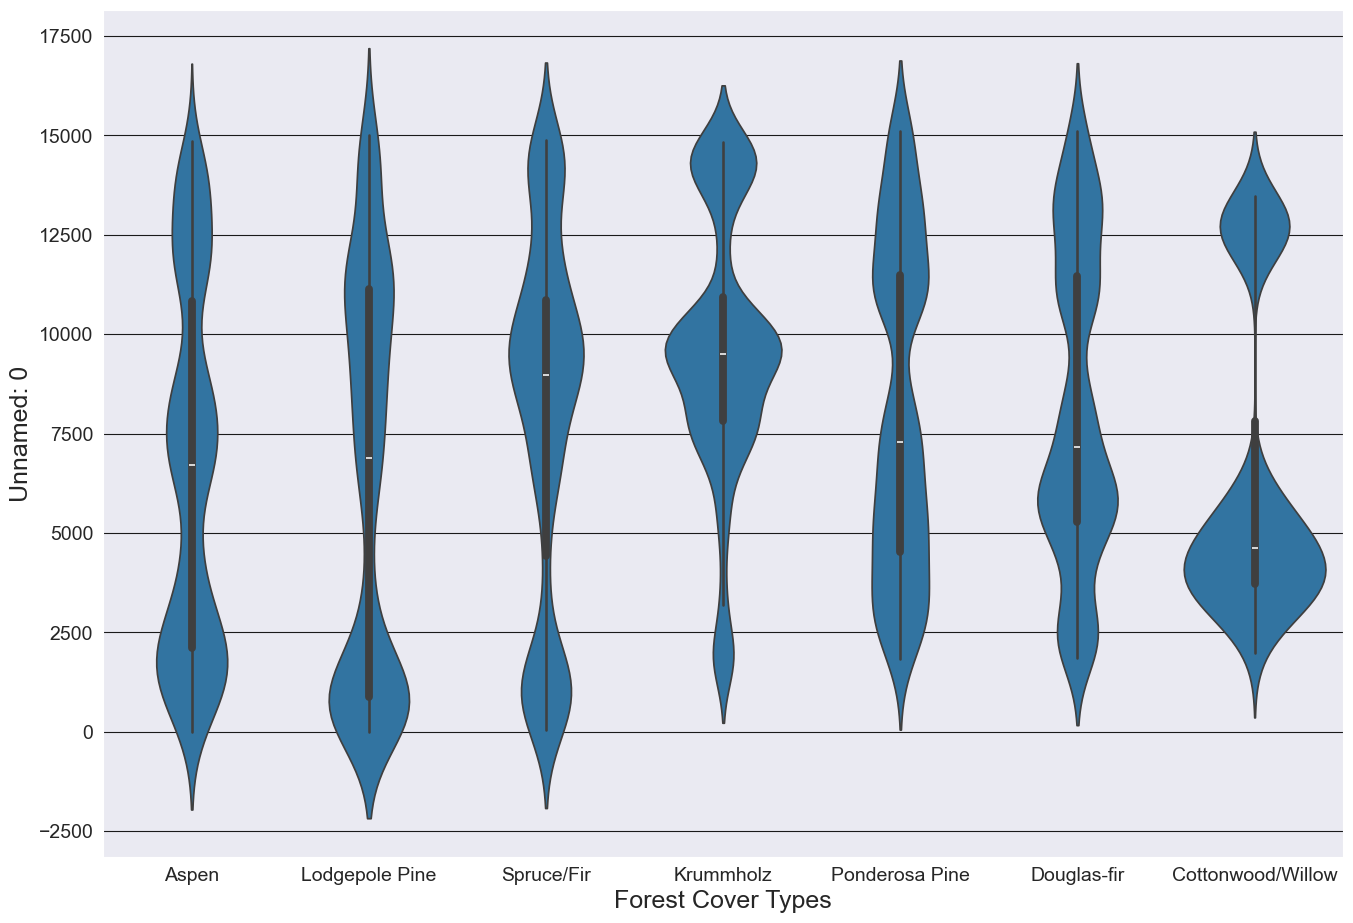

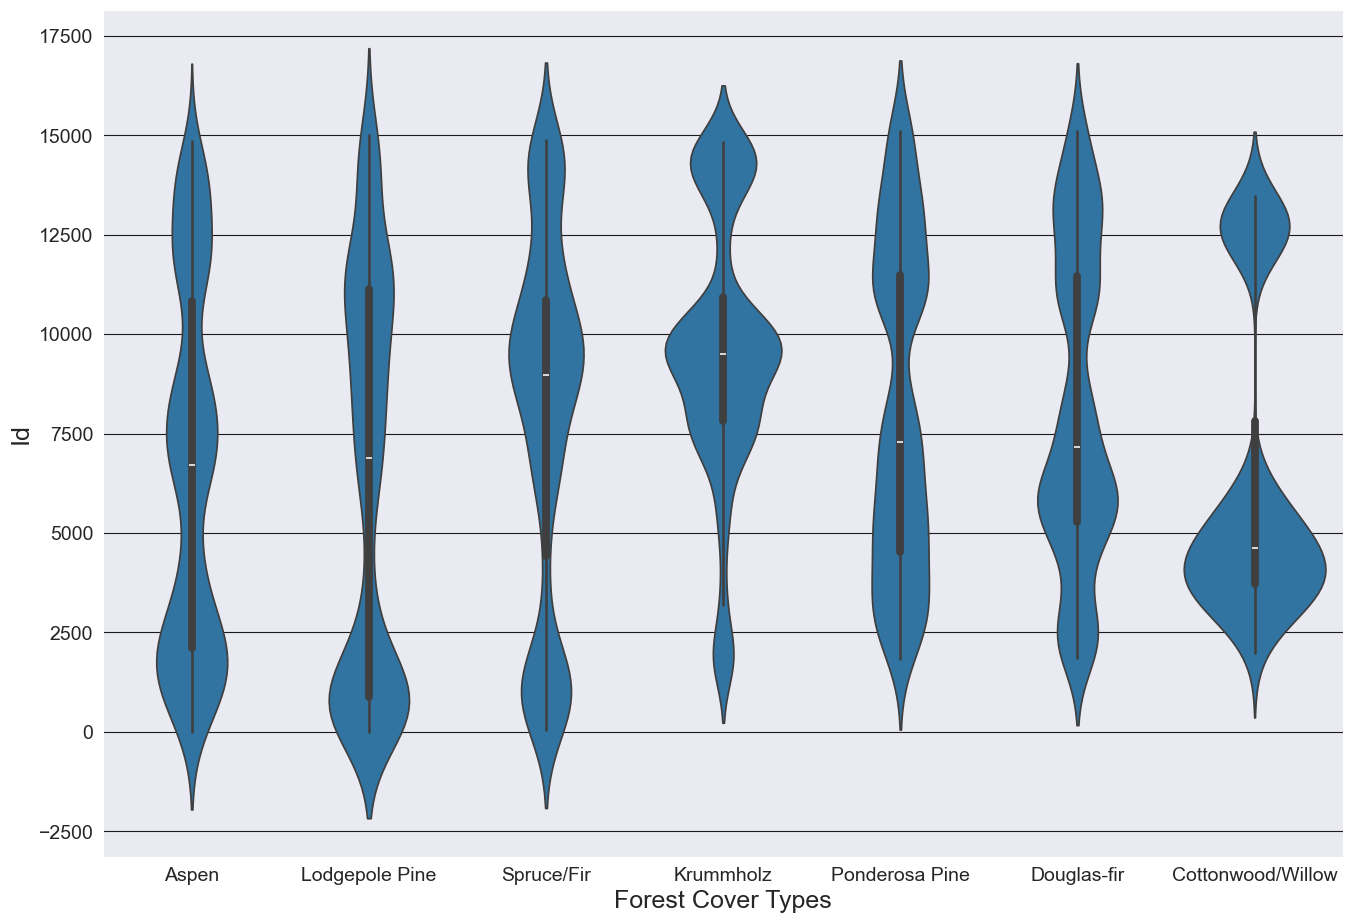

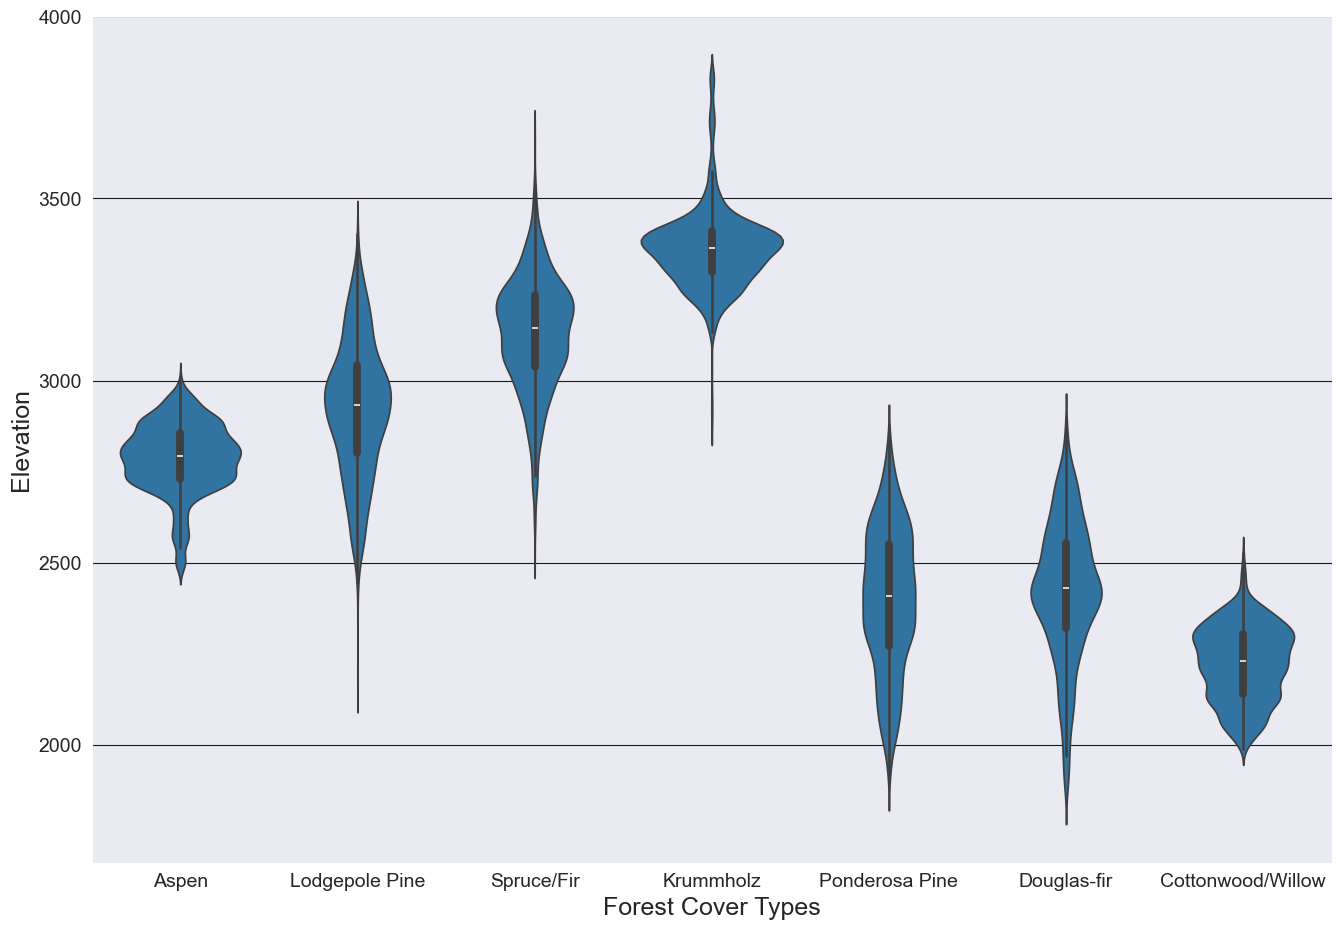

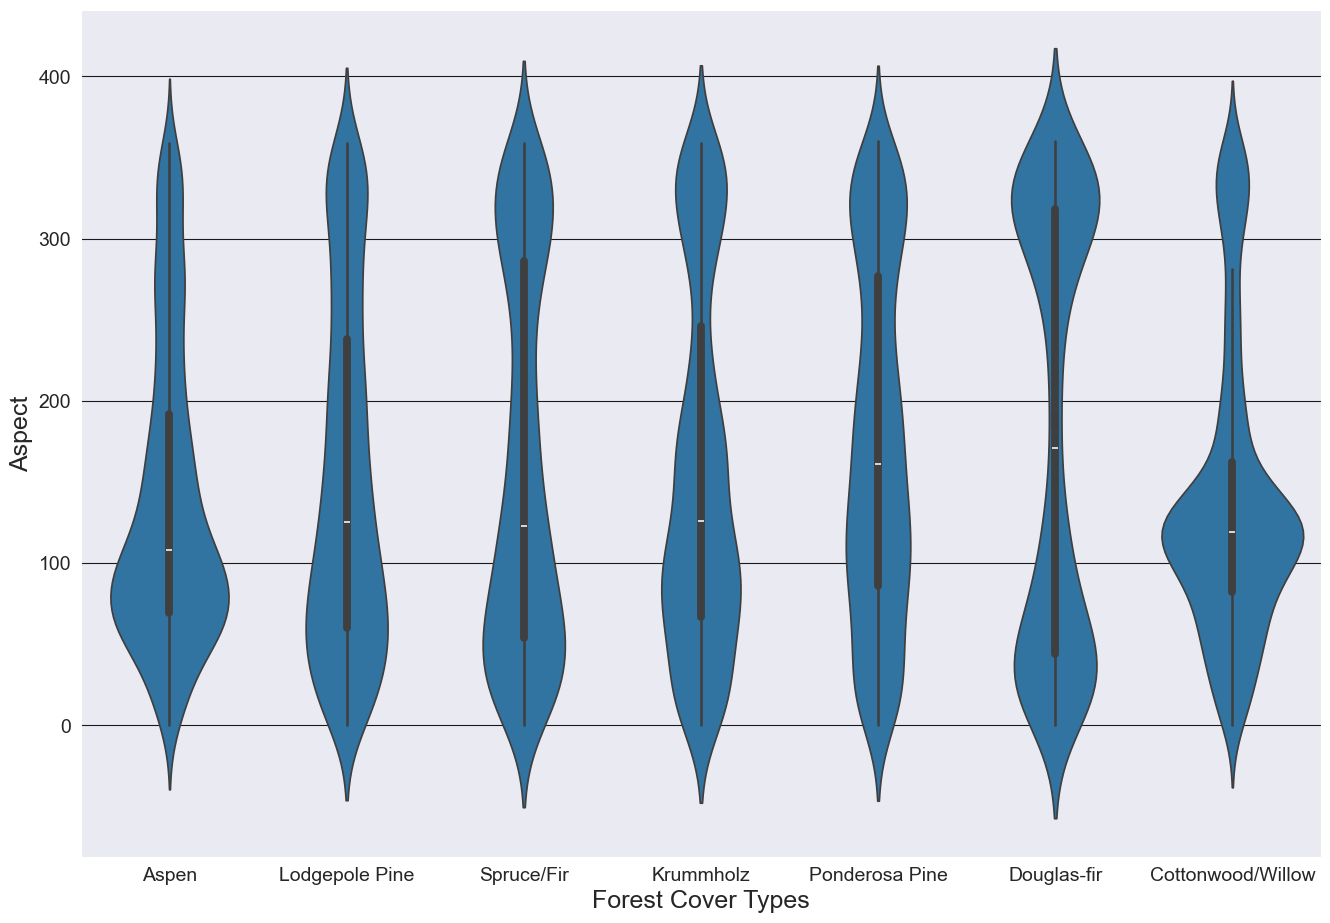

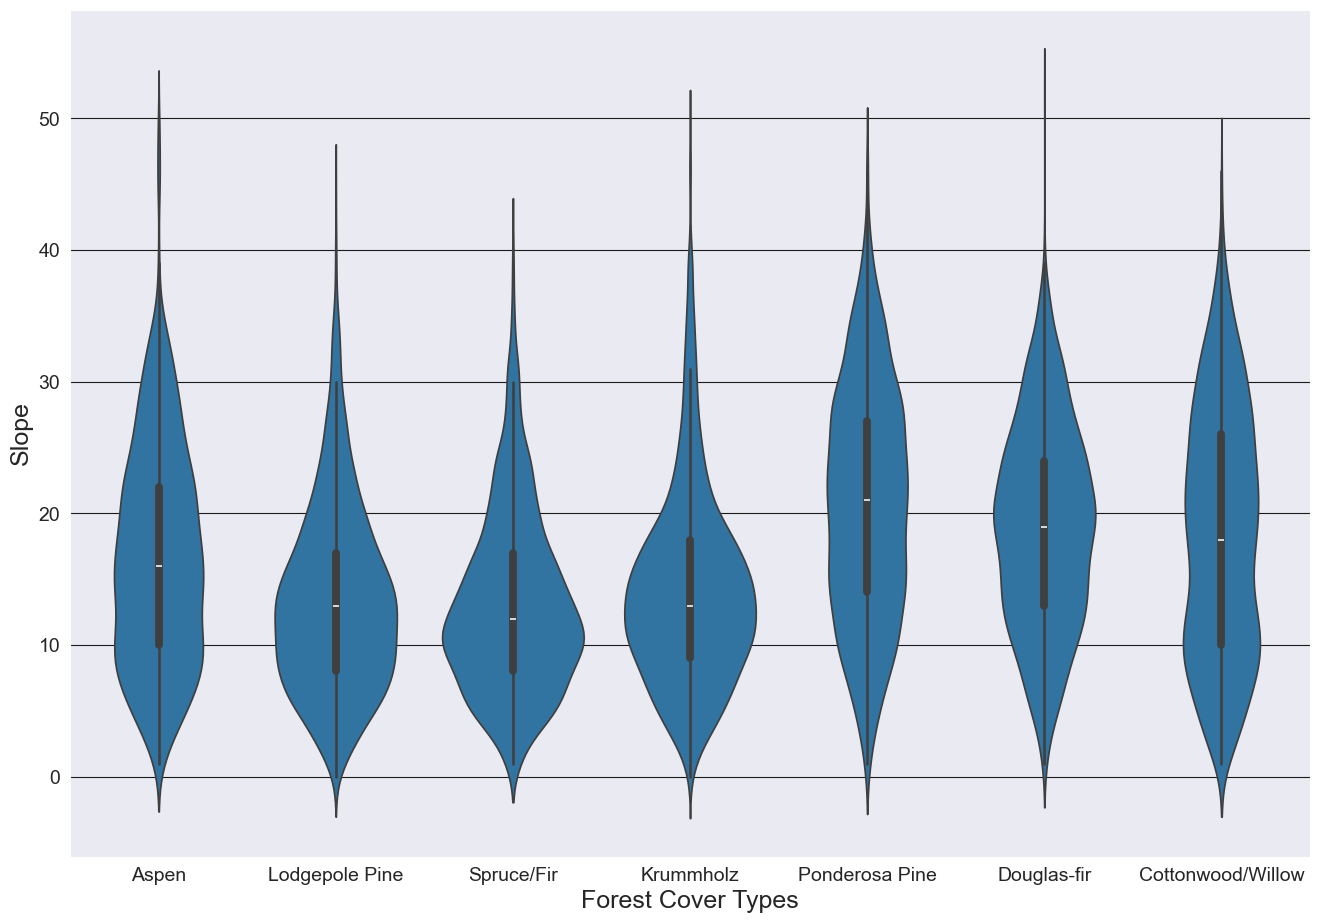

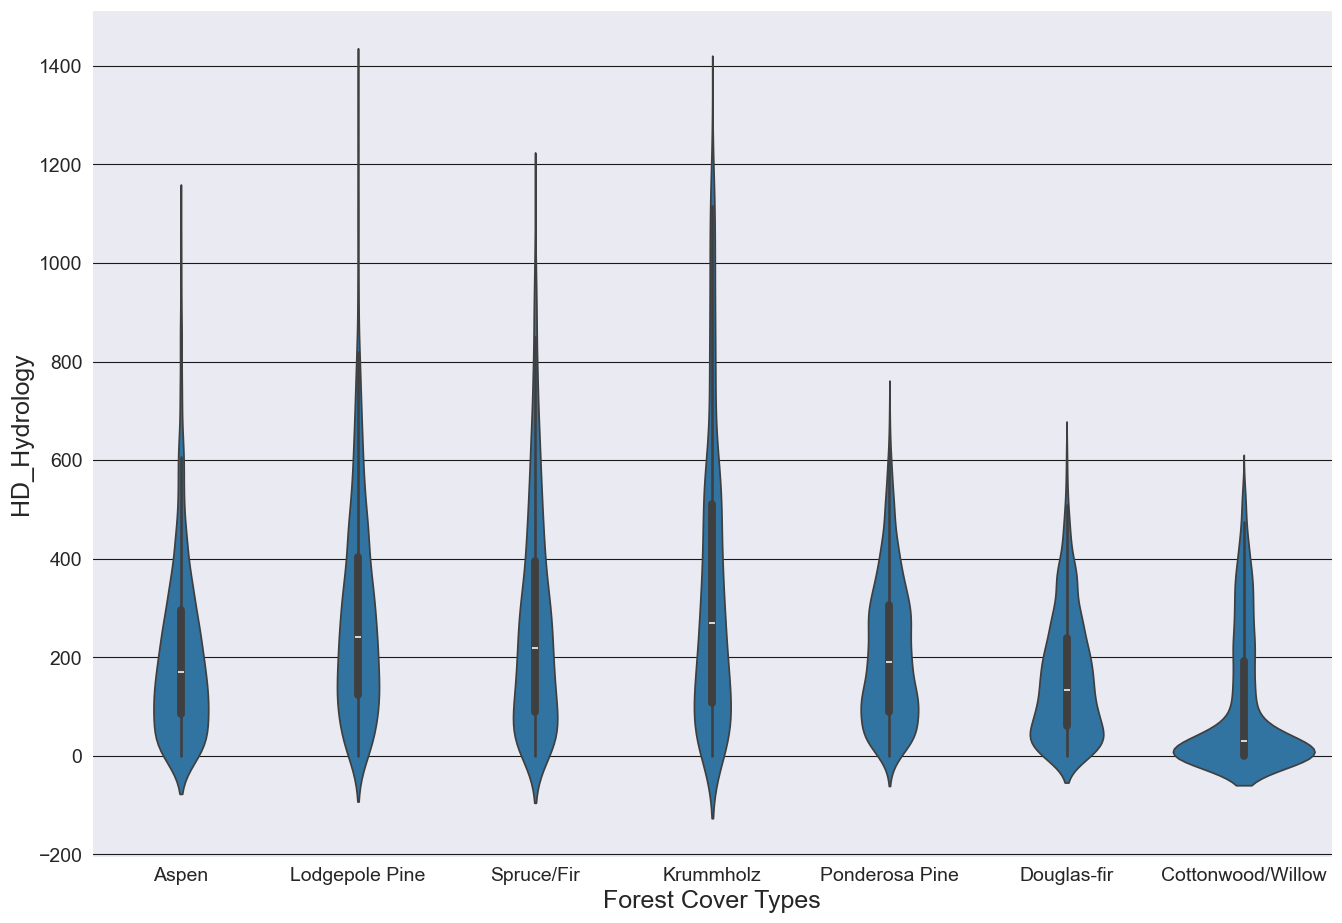

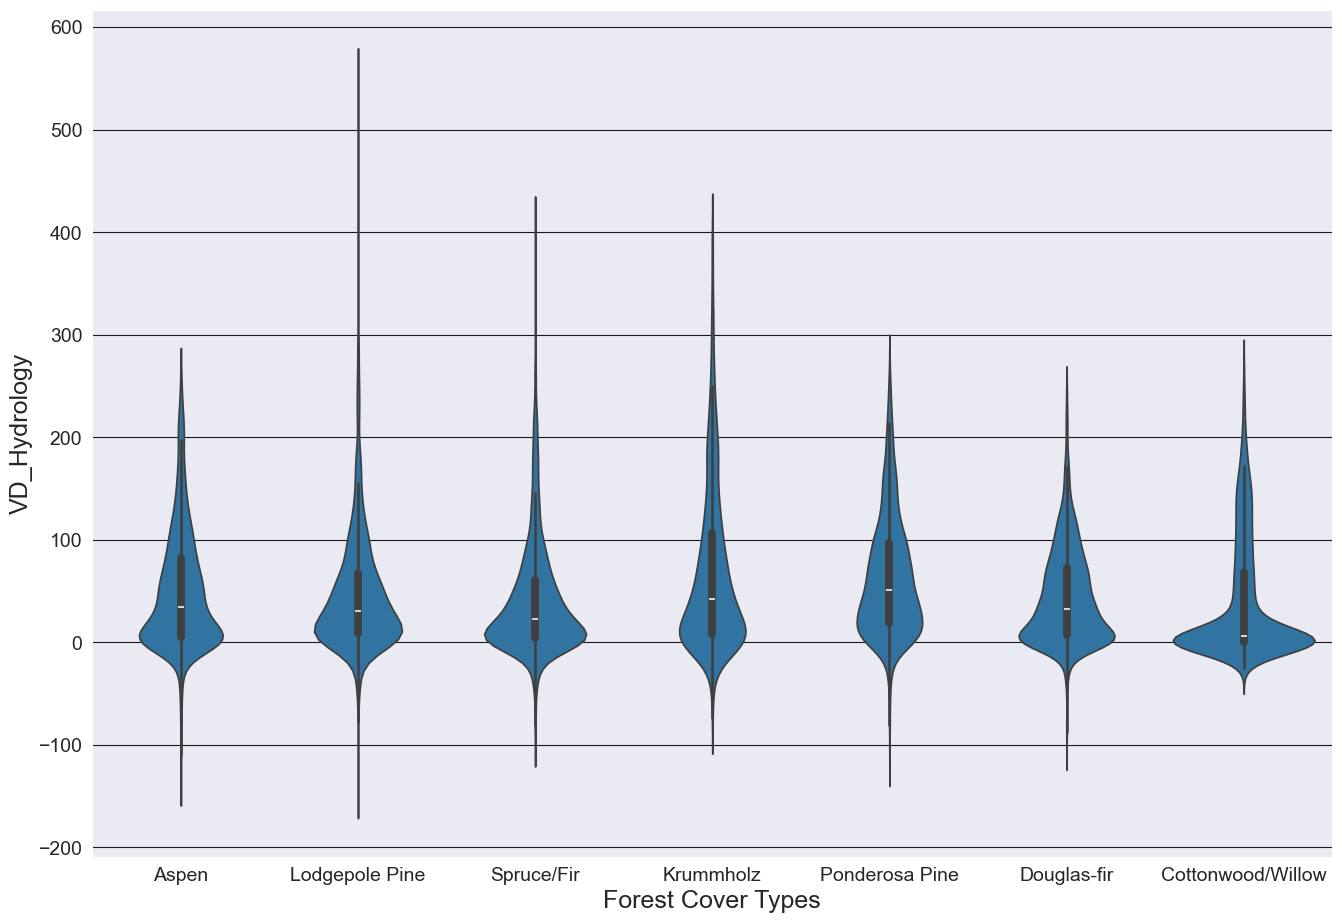

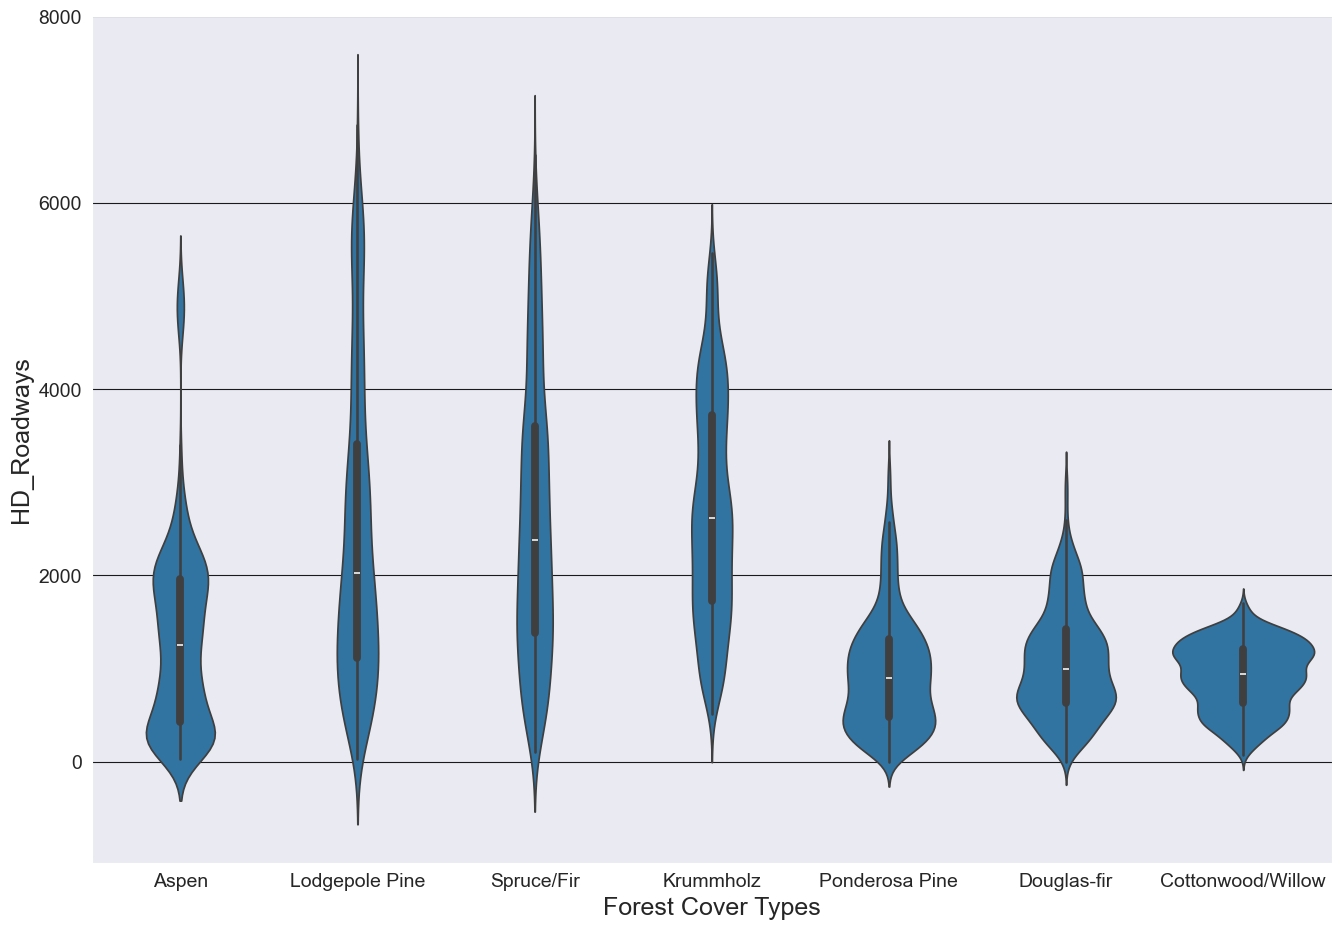

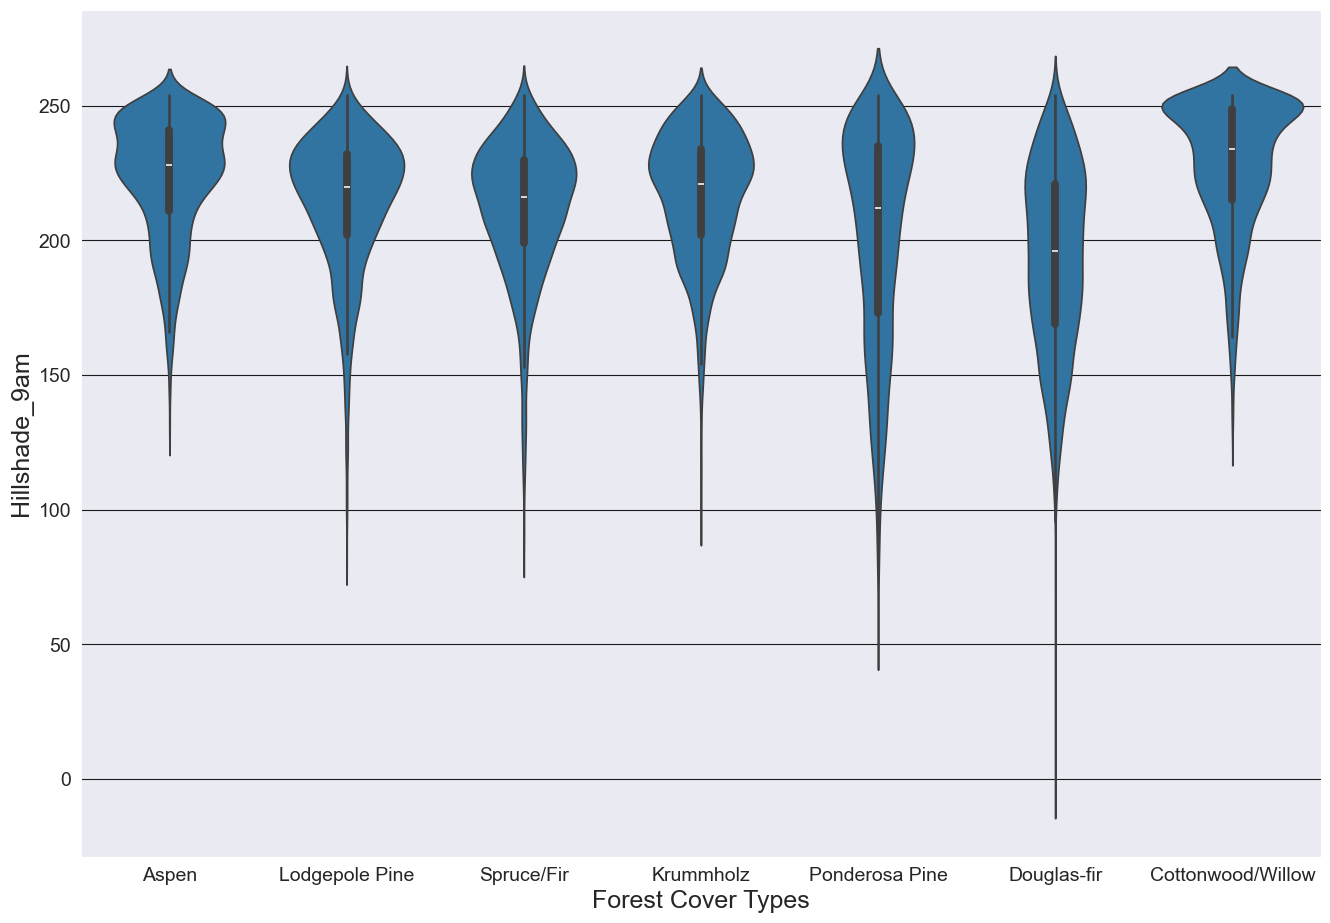

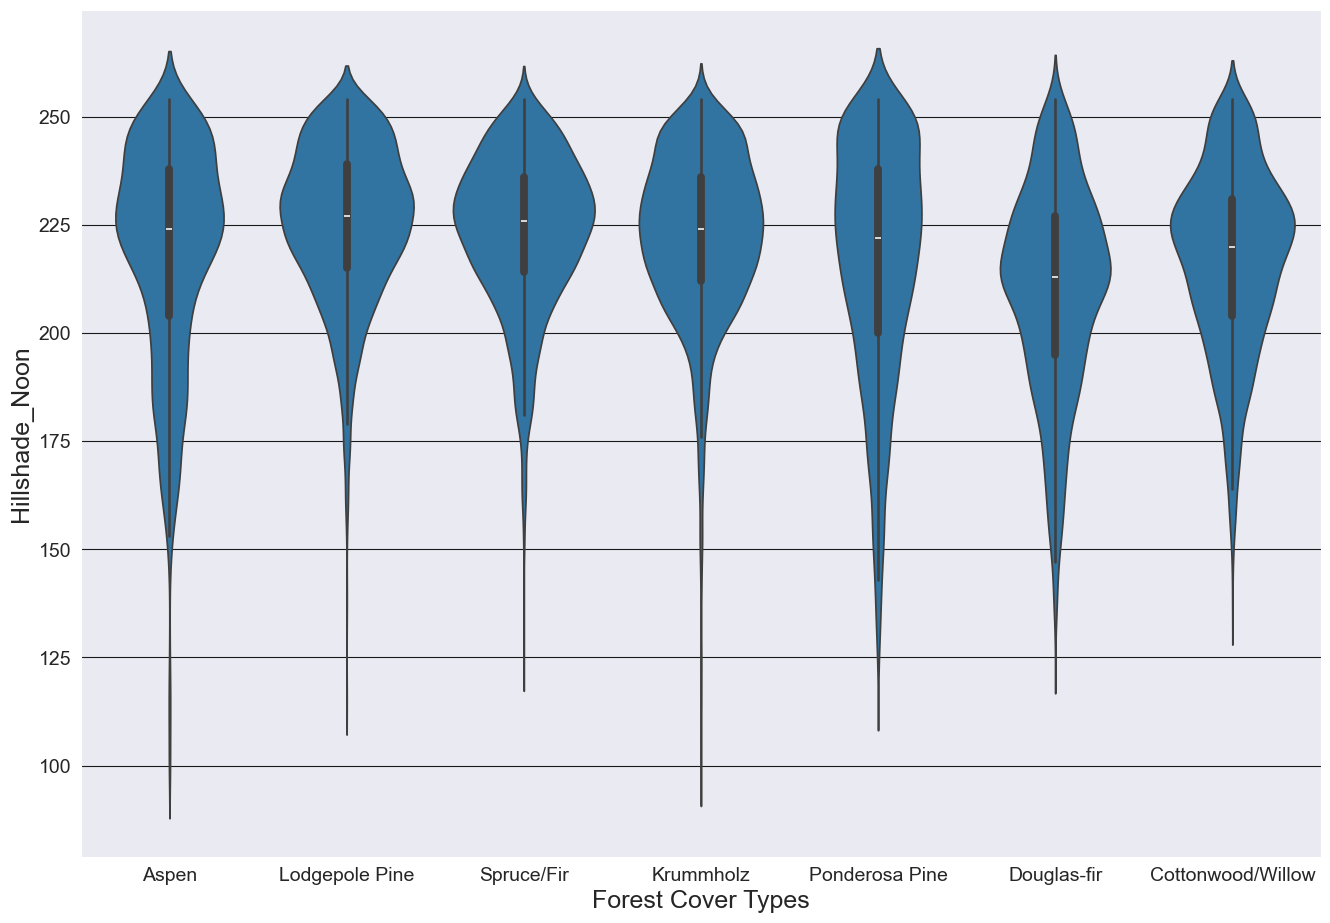

In [68]:
# extract all numerical features from train
num_features = df.iloc[:,:10]

# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = df['Cover_Type']

# features to be compared with target variable
features = num_features.columns

# loop for violin plot
for i in range(0, len(features)):
    plt.subplots(figsize=(16,11))
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types', size=18)
    plt.ylabel(features[i], size=18)
    plt.show()

#### Infernces
- Elevation
    - 'Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m.
    - 'Krummholz' has observations of most elevated trees ranging as low as ~2800m to as high as ~3800m.
- Aspect
    -  This feature has a normal distribution for each class.
- Slope
    -  Slope has lower values compared to most features as its measured in degrees and least to Aspect which is also measured in degrees.
    -  It has the least maximum value of all features. Looking at the plot we can say that it belongs to Cover_Type2.
    -  All classes have dense slope observations between 0-20 degrees.
- Hillshade_9am and Hillshade_Noon are left or negatively skewed distribution where they take on max value between 200-250 index value for most observation in each class.

    

In [69]:
fig, axs = plt.subplots(ncols=2,figsize=(15,4))
fig.suptitle("Positive Correlations",fontsize='20')

sns.lineplot(x= "Aspect",y="Hillshade_3pm",data=df,color='green',ax=axs[0])
sns.lineplot(x= "Hillshade_Noon",y="Hillshade_3pm",data=df,color='green',ax=axs[1])

<Axes: xlabel='Hillshade_Noon', ylabel='Hillshade_3pm'>

In [70]:
fig, axs = plt.subplots(ncols=3,figsize=(15,4))
fig.suptitle("Negative Correlations",fontsize='20')

sns.lineplot(x= "Hillshade_3pm",y="Hillshade_9am",data=df,color='red',ax=axs[0])
sns.lineplot(x= "Slope",y="Elevation",data=df,color='red',ax=axs[1])
sns.lineplot(x= "Hillshade_Noon",y="Slope",data=df,color='red',ax=axs[2])

<Axes: xlabel='Hillshade_Noon', ylabel='Slope'>

#### Final Report
- Forest cover type 'Lodgepole Pine' has largest forest cover and 'Cottonwood/Willow' has lowest forest cover.
- Cache_La_Poudre and Neota Wilderness Areas have same number of forest covers.
- Most of the data is abundant with soil type 29 and 23.
- There is a positive correlation between Elevation and Distance to Roadways.
- There is a negative correlation between hillshade index at 9am and 3pm.
- Horizontal_Distance_To_Roadways has the most spread out data of all features.
- Cottonwood/Willow' has the most forest cover at elevation between 2000m - 2500m